In [76]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')

In [77]:
df=pd.read_csv('Medicalpremium.csv')

In [78]:
df.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

# Exploring dataset

In [79]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [80]:
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


In [81]:
print("Size of dataset",df.shape)

Size of dataset (986, 11)


In [82]:
print("The no of variables: ",df.columns)

The no of variables:  Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')


# Performing Explanatory Data Analysis to see the distribution of data

In [83]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(df)
categorical_columns = categorical_columns_selector(df)

print('The categorical columns are ',categorical_columns)

print('The numerical columns are ',numerical_columns)

The categorical columns are  []
The numerical columns are  ['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice']


**So all the columns are numerical data.**

In [84]:
numerical_columns = df[['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice']]

In [85]:
numerical_columns.nunique()

Age                        49
Diabetes                    2
BloodPressureProblems       2
AnyTransplants              2
AnyChronicDiseases          2
Height                     44
Weight                     74
KnownAllergies              2
HistoryOfCancerInFamily     2
NumberOfMajorSurgeries      4
PremiumPrice               24
dtype: int64

In [86]:
# datapoints that have can be plotted to see their distribution.
numerical_columns_1= numerical_columns[['Age', 'Height', 'Weight', 'PremiumPrice']]

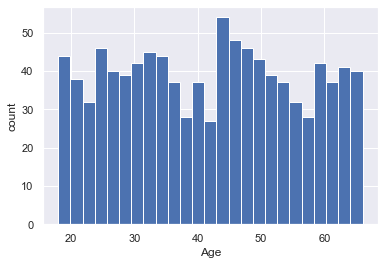

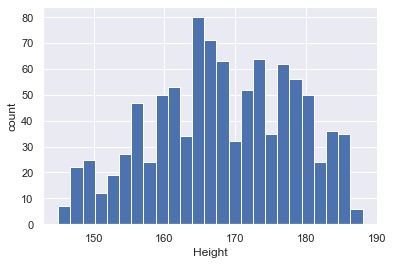

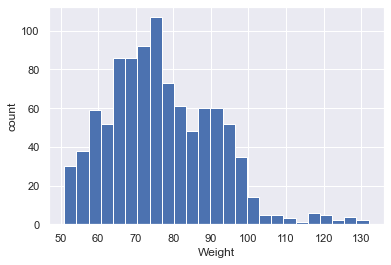

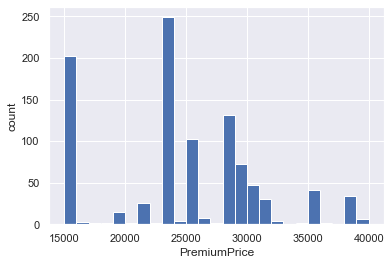

In [87]:
for i in numerical_columns_1:
    df[i].hist(bins=25)
    plt.xlabel(i)
    plt.ylabel('count')
    plt.show()

**Relationship between the premium and the weight of policy holders.**

**Relationship between the premium and the age of policy holders.**

### Data Cleaning.

In [88]:
# checking for missing values
df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [89]:
# Checking the duplication.
df.duplicated().sum()

0

In [90]:
df.Weight

0      57
1      73
2      59
3      93
4      88
       ..
981    67
982    70
983    71
984    73
985    75
Name: Weight, Length: 986, dtype: int64

### Feature Engineering.

1. Calculating the BMI 
2. Classification for the premium payment
3. Classification for the age based on young,average,old.

**1.11 Calculating the BMI.**

In [91]:
##### Create the BMI for each policy holder.
'''
[weight (kg) / height (cm) / height (cm)] x 10,000

'''
df['bmi_unit']=(df.Weight / df.Height / df.Height) * 10000
    
""" Converge the BMI to either, Healthy, overweight or Obese.
    
    BMI Scores:
        If the BMI scores is  
                             **BMI Scores**          **Categorical.**
                             500% and above.         Underweight
                             200% < X < 499%         Healthly 
                             150% < X < 199%         Over_weight
                             120% < X < 149%         Obese   
"""
def BMI(row):
    if row['bmi_unit'] < 18.5:
        return 'under_weight'
    elif row['bmi_unit'] >= 18.6 and row['bmi_unit'] < 24.9:
        return 'healthy'
    elif row['bmi_unit'] >= 24.9 and row['bmi_unit'] < 29.9:
        return 'over_weight'
    else:
        return 'obese'
df['BMI'] = df.apply(BMI, axis=1)

<AxesSubplot:xlabel='BMI', ylabel='PremiumPrice'>

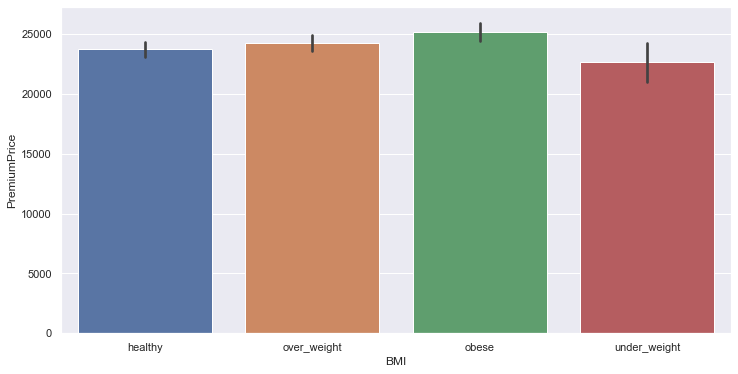

In [92]:
fig,ax=plt.subplots(figsize=(12,6))
sns.barplot(x='BMI',y='PremiumPrice',data=df,ax=ax)

<AxesSubplot:xlabel='Age', ylabel='BMI'>

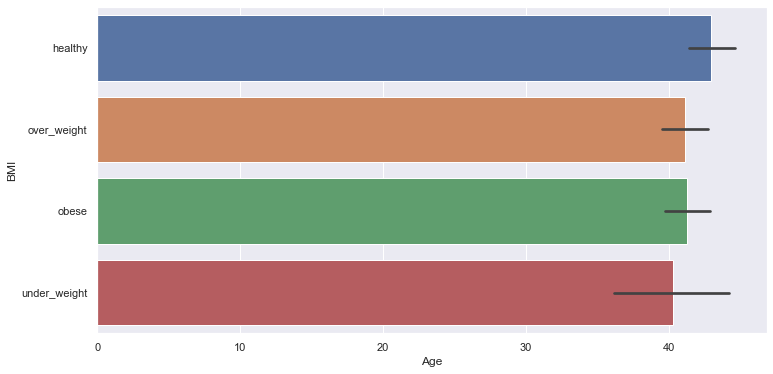

In [93]:
fig,ax=plt.subplots(figsize=(12,6))
sns.barplot(y='BMI',x='Age',data=df,ax=ax)

**1.12 Premium Classification.**

In [94]:
pr_lab=['Low','Basic','Average','High','SuperHigh']
df['Premium_Level']=pr_bins=pd.cut(df['PremiumPrice'],bins=5,labels=pr_lab,precision=0)

<AxesSubplot:xlabel='Premium_Level', ylabel='Age'>

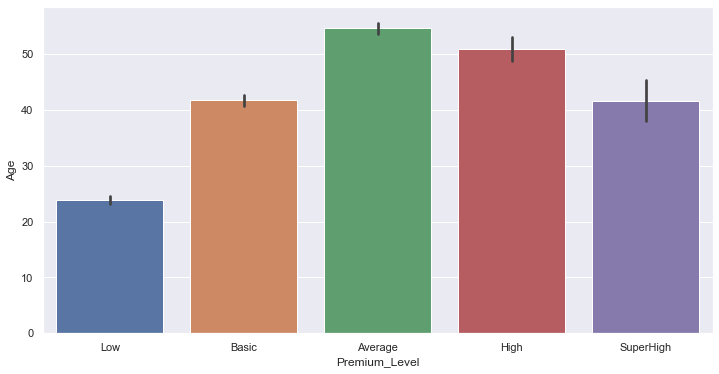

In [95]:
fig,ax=plt.subplots(figsize=(12,6))
sns.barplot(y='Age',x='Premium_Level',data=df,ax=ax)

In [96]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['BMI'] = le.fit_transform(df['BMI'])

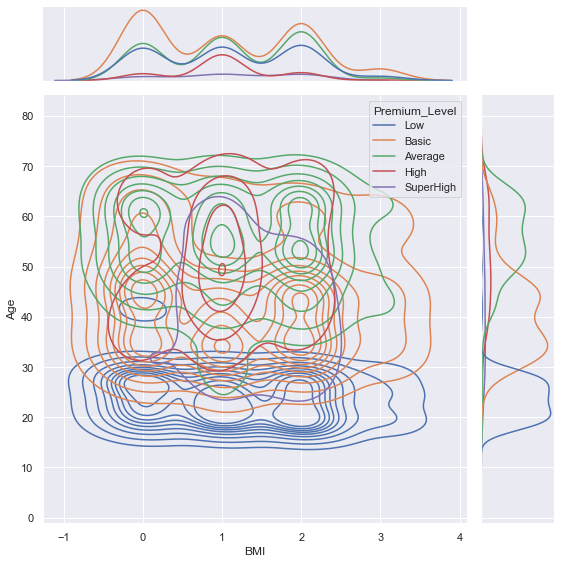

In [97]:
# relationship between the age, BMI and premium level
sns.jointplot(x='BMI',y='Age',data=df,hue='Premium_Level',height=8,kind='kde');

### 1.13 The age classification based on young, middle, old and super old.

In [98]:
age_lab=['Teen','Young','Middle','Old','SuperOld']
df['AgeLabel']=pd.cut(df['Age'],bins=5,labels=age_lab,precision=0)

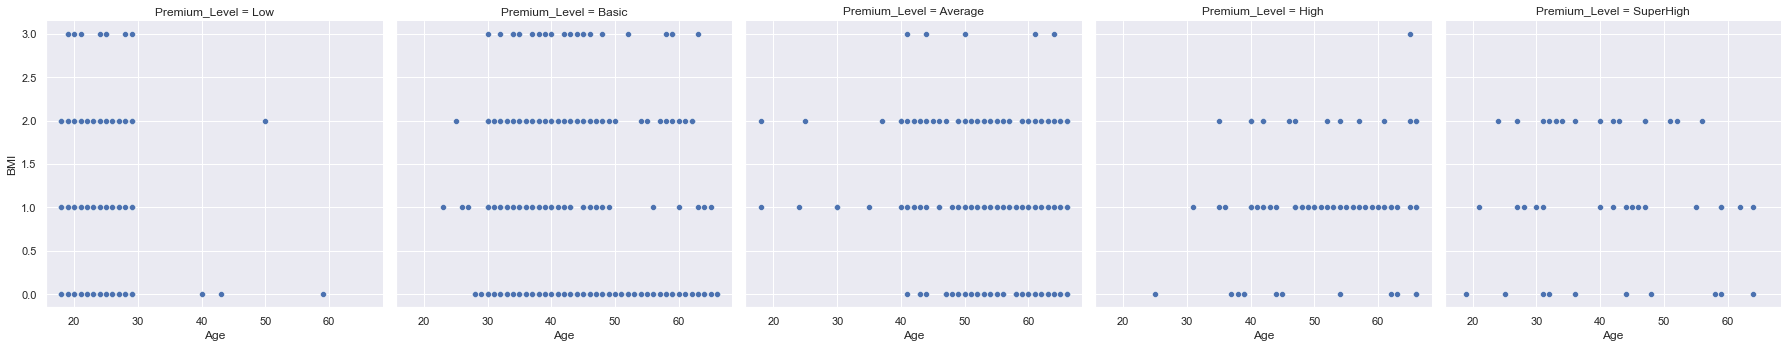

In [99]:
sns.relplot(x='Age',y='BMI',data=df,col='Premium_Level',aspect=10/10)

<AxesSubplot:xlabel='Premium_Level', ylabel='Age'>

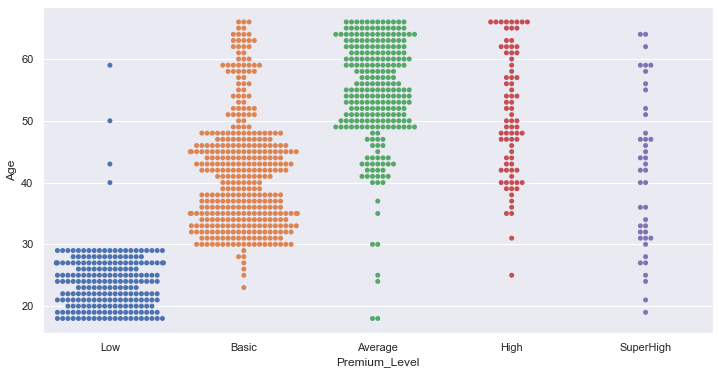

In [100]:
fig,ax=plt.subplots(figsize=(12,6))
sns.swarmplot(x='Premium_Level',y='Age',data=df,ax=ax)

In [101]:
#convert the categorical data into numerical.
df=pd.get_dummies(data=df,columns=['AgeLabel','Premium_Level','BMI'])

### Feature Selections.

**Pearson's coefficient.**

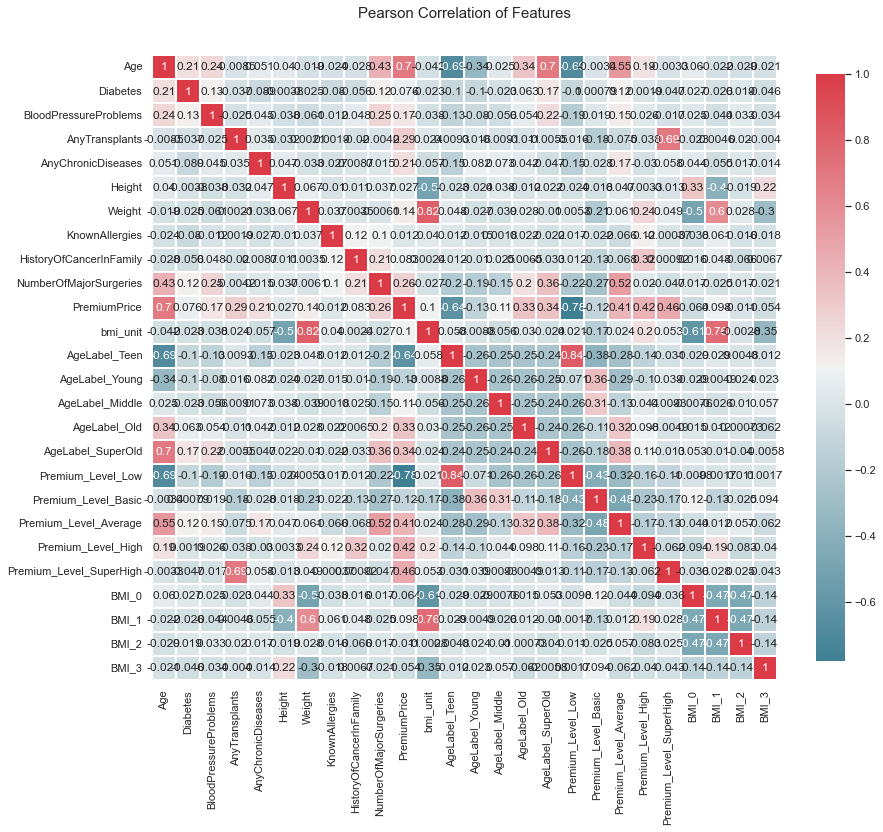

In [102]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df)

**Getting Features Importance**

In [103]:
X=df.drop('PremiumPrice',axis=1)
y=df['PremiumPrice']

In [104]:
# standardize the dataset.
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xsc=sc.fit_transform(X)

In [105]:
xsc=pd.DataFrame(xsc,columns=X.columns)

In [106]:
from sklearn.feature_selection import mutual_info_regression
mi_scores = mutual_info_regression(xsc,y)
mi_scores = pd.Series(mi_scores, name="MI Scores",index=xsc.columns)
mi_scores = mi_scores.sort_values(ascending=False)

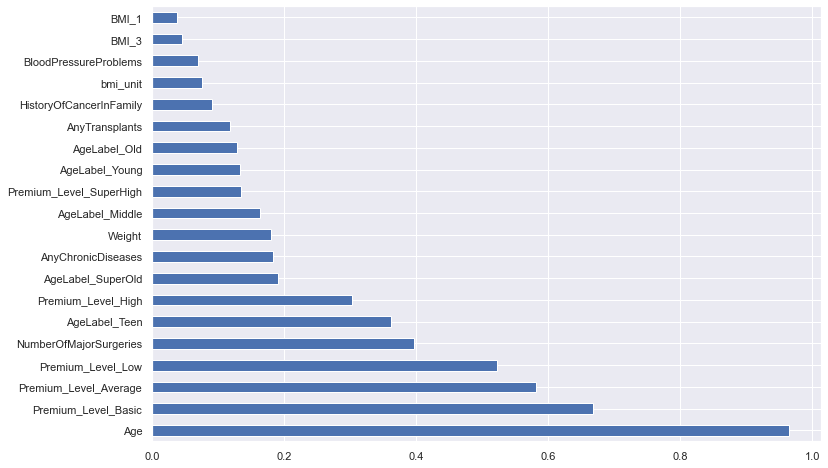

In [107]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
mi_scores.nlargest(20).plot(kind='barh')
plt.show()

# Modelling using Various Regressors.

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
xtr,xte,ytr,yte=train_test_split(xsc,y,random_state=46,test_size=0.25)

### 1.1 using Random Forest Regressors.

In [110]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
reg_rf = RandomForestRegressor()
reg_rf.fit(xtr, ytr)

RandomForestRegressor()

In [138]:
# Model Evaluation 
from sklearn.metrics import mean_absolute_error 
rf_preds=reg_rf.predict(xte)
r2_score(yte,rf_preds)

0.9961238125984648

In [111]:
reg=RandomForestRegressor(n_jobs=-1,verbose=2)
param_grid={'n_estimators':[60,50,55],'criterion':['mse','mae'],'max_depth':[7],'min_samples_split':[3],'max_features':['auto']}
gs=GridSearchCV(reg,param_grid=param_grid,cv=3,n_jobs=-1,verbose=1)

In [112]:
gs.fit(xtr,ytr)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 60building tree 2 of 60
building tree 3 of 60

building tree 4 of 60
building tree 5 of 60building tree 6 of 60

building tree 7 of 60
building tree 8 of 60
building tree 9 of 60building tree 10 of 60

building tree 11 of 60building tree 12 of 60

building tree 13 of 60building tree 14 of 60

building tree 15 of 60building tree 16 of 60

building tree 17 of 60building tree 18 of 60

building tree 19 of 60
building tree 20 of 60building tree 21 of 60
building tree 22 of 60
building tree 23 of 60

building tree 24 of 60building tree 25 of 60

building tree 26 of 60building tree 27 of 60building tree 28 of 60


building tree 29 of 60building tree 30 of 60building tree 31 of 60


building tree 32 of 60
building tree 33 of 60
building tree 34 of 60building tree 35 of 60

building tree 36 of 60building tree 37 of 60

building tree 38 of 60building tree 39 of 60

building tree 40 of 60building tree 41 of 60

building tree 42 of 60
building tree 43 of 60
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.3s finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1, verbose=2),
             n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [7],
                         'max_features': ['auto'], 'min_samples_split': [3],
                         'n_estimators': [60, 50, 55]},
             verbose=1)

In [113]:
gs.best_params_

{'criterion': 'mse',
 'max_depth': 7,
 'max_features': 'auto',
 'min_samples_split': 3,
 'n_estimators': 60}

In [114]:
gs.best_score_

0.9941398800569825

In [115]:
predicted_y=gs.predict(xte)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished


In [116]:
from sklearn.metrics import r2_score
r2_score(yte,predicted_y)

0.9963040731474202

### 1.2 Cat boost Regressors

In [117]:
from catboost import CatBoostRegressor
predictions = []
for i in range(10):
  # Training the model
  ct=CatBoostRegressor(iterations=1000, 
                    loss_function='MAE',  
                       
                    logging_level='Silent',
                    depth = i
                    )
ct.fit(xtr, ytr)
    

  # Making predictions
preds = ct.predict(xte)
predictions.append(preds)

# Averaging the predictions
preds = np.mean(predictions, axis = 0)

In [118]:
# Model Evaluation 
from sklearn.metrics import mean_absolute_error 
r2_score(yte,preds)

0.9854288219261328

### 1.3 Xtreme Gradient Boost Regressors.

In [119]:
from xgboost import XGBRegressor

# create an xgboost regression model
model_xgb = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model_xgb.fit(xtr, ytr, 
             early_stopping_rounds=10, 
             eval_set=[(xte, yte)], 
             verbose=False)
# Model Prediction
cost_predict = model_xgb.predict(xte)

In [120]:
# Model Evaluation.
#Checking accuracy on test data
r2_score(yte,cost_predict)

0.9965926349445574

In [235]:
import xgboost as xgb


param_grid={'n_estimators':[500,1000,2000,10000,20000],
            'criterion':['mse','mae'],
            'max_depth':[7],
            'min_samples_split':[3],
            'max_features':['auto']}

model_xgb = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

clf = GridSearchCV(estimator=model_xgb, 
                   param_grid=param_grid,
                   cv = 5,
                   n_jobs=-1,
                   verbose=1)
clf.fit(xtr, ytr)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[17:30:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "criterion", "max_features", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    enable_categorical=False, eta=0.1,
                                    gamma=None, gpu_id=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=7, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=1000, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
 

In [236]:
xgb_preds = clf.predict(xte)

In [237]:
r2_score(yte,xgb_preds)

0.9964742489416315

### 1.4 Linear Regression.

In [121]:
# model fitting
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(xtr, ytr)

LinearRegression()

In [122]:
# Model Prediction
lin_preds = lin_reg.predict(xte)

In [123]:
# Model Evaluation.
#Checking accuracy on test data
r2_score(yte,lin_preds)

0.9802480892093381

### 1.5 Modelling using LightGBM.

In [206]:
from lightgbm import LGBMRegressor
model = lgb.LGBMRegressor(learning_rate=0.09,max_depth=-5,random_state=42)
model.fit(xtr,ytr,eval_set=[(xte, yte), (xtr,ytr)],
          verbose=20,eval_metric='logloss')

[20]	training's l2: 1.26111e+06	valid_0's l2: 1.35275e+06
[40]	training's l2: 260686	valid_0's l2: 364135
[60]	training's l2: 141894	valid_0's l2: 241143
[80]	training's l2: 101037	valid_0's l2: 218410
[100]	training's l2: 74889.1	valid_0's l2: 198232


LGBMRegressor(learning_rate=0.09, max_depth=-5, random_state=42)

In [207]:
lightlgm_predict = model.predict(xte)

In [208]:
#Checking accuracy on test data
r2_score(yte,lightlgm_predict )

0.9949326417011345

#### Hyper parameter tuning using light Lgm Boosting.

In [215]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
param_grid={'n_estimators':[50,100,150],
            'criterion':['mse','mae'],
            'max_depth':[-5],
            'min_samples_split':[3],
            'max_features':['auto']}



In [216]:
lgbm_tun = GridSearchCV(estimator = model, 
                        param_grid = param_grid, 
                        cv = 5,
                        n_jobs=-1,
                        verbose=1)

lgbm_tun.fit(xtr,ytr)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split


GridSearchCV(cv=5,
             estimator=LGBMRegressor(learning_rate=0.09, max_depth=-5,
                                     random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [-5],
                         'max_features': ['auto'], 'min_samples_split': [3],
                         'n_estimators': [50, 100, 150]},
             verbose=1)

In [217]:
pred_lgm=lgbm_tun.predict(xte)

In [218]:
from sklearn.metrics import r2_score
r2_score(yte,pred_lgm)

0.9952235032987357

**The following was the perfomance of various models:**

|Model- Regressor  |% Accuracy|
| :--- | :---|
|Linear regression|98.00% |
|Catboost | 98.54% |
|light lgm |99.52% |
|Xgboost  |99.65% |
|Random Forest | 99.63% |

So the Accuracy is the random forest has the best model at its at **99.66%**